In [37]:
from keras.layers.core import Activation, Dense, Dropout, SpatialDropout1D
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
import collections
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import numpy as np
import os

In [2]:
pwd

'/home/mb45296/Deep Learning and NLP A_Z/1. Deep NLP Intuition/cornell movie-dialogs corpus'

In [3]:
DATA_DIR = '/home/mb45296/Deep Learning and NLP A_Z/1. Deep NLP Intuition/cornell movie-dialogs corpus'

MAX_FEATURES = 2000
MAX_SENTENCE_LENGTH = 40

EMBEDDING_SIZE = 128
HIDDEN_LAYER_SIZE = 64
BATCH_SIZE = 32
NUM_EPOCHS = 10

maxlen = 0
word_freqs = collections.Counter()
num_recs = 0
#ftrain = open(os.path.join(DATA_DIR,"ejem.txt"), 'rb')
ftrain=open("umich-sentiment-train.txt", 'r')

In [4]:
#nltk.download()

In [5]:
for line in ftrain:
    label, sentence = line.strip().split("\t")
    print(label,sentence)
    words = nltk.word_tokenize(sentence.lower())
    if len(words) > maxlen:
        maxlen = len(words)
    for word in words:
        word_freqs[word] += 1
    num_recs += 1
ftrain.close()

1 The Da Vinci Code book is just awesome.
1 this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this.
1 i liked the Da Vinci Code a lot.
1 i liked the Da Vinci Code a lot.
1 I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.
1 that's not even an exaggeration ) and at midnight we went to Wal-Mart to buy the Da Vinci Code, which is amazing of course.
1 I loved the Da Vinci Code, but now I want something better and different!..
1 i thought da vinci code was great, same with kite runner.
1 The Da Vinci Code is actually a good movie...
1 I thought the Da Vinci Code was a pretty good book.
1 The Da Vinci Code is one of the most beautiful movies ive ever seen.
1 The Da Vinci Code is an * amazing * book, do not get me wrong.
1 then I turn on the light and the radio and enjoy my Da Vinci Code.
1 The Da Vinci Code was REALLY good.
1 i love da vinci code....
1 i loved da vinci code..
1 TO NIGHT:: THE DA VINCI

In [6]:
vocab_size = min(MAX_FEATURES, len(word_freqs)) + 2
word2index = {x[0]: i+2 for i, x in
             enumerate(word_freqs.most_common(MAX_FEATURES))}
word2index["PAD"] = 0
word2index["UNK"] = 1
index2word = {v:k for k, v in word2index.items()}


In [7]:
index2word

{0: 'PAD',
 1: 'UNK',
 2: 'i',
 3: ',',
 4: '.',
 5: 'the',
 6: 'and',
 7: '!',
 8: 'harry',
 9: 'vinci',
 10: 'da',
 11: 'brokeback',
 12: 'code',
 13: 'mountain',
 14: 'potter',
 15: '...',
 16: 'love',
 17: 'is',
 18: 'a',
 19: 'was',
 20: 'mission',
 21: 'impossible',
 22: 'awesome',
 23: 'like',
 24: 'it',
 25: 'to',
 26: 'movie',
 27: 'that',
 28: "'s",
 29: 'because',
 30: 'sucks',
 31: 'hate',
 32: 'sucked',
 33: 'so',
 34: 'as',
 35: 'my',
 36: '``',
 37: 'much',
 38: 'of',
 39: 'really',
 40: 'movies',
 41: 'stupid',
 42: 'you',
 43: 'down',
 44: 'we',
 45: 'but',
 46: 'be',
 47: 'with',
 48: 'just',
 49: 'one',
 50: 'know',
 51: 'potter..',
 52: 'suck',
 53: 'out',
 54: '3',
 55: 'who',
 56: '/',
 57: 'or',
 58: 'am',
 59: 'loved',
 60: 'want',
 61: 'into',
 62: 'which',
 63: 'right',
 64: 'for',
 65: 'an',
 66: "n't",
 67: 'this',
 68: 'me',
 69: ':',
 70: 'are',
 71: 'think',
 72: 'not',
 73: 'how',
 74: 'if',
 75: 'depressing',
 76: 'people',
 77: 'his',
 78: 'would',
 79

In [8]:
X = np.empty((num_recs, ), dtype=list)
y = np.zeros((num_recs, ))
i = 0
ftrain = open("umich-sentiment-train.txt", 'r')
for line in ftrain:
    label, sentence = line.strip().split("\t")
    words = nltk.word_tokenize(sentence.lower())
    seqs = []
    for word in words:
        if word in word2index:
            seqs.append(word2index[word])
        else:
            seqs.append(word2index["UNK"])
    X[i] = seqs
    y[i] = int(label)
    i += 1
ftrain.close()


In [9]:
'sivullinen' in word2index

True

In [10]:
X.shape

(7086,)

In [11]:
X = sequence.pad_sequences(X, maxlen=MAX_SENTENCE_LENGTH)

In [12]:
X

array([[  0,   0,   0, ...,  48,  22,   4],
       [  0,   0,   0, ..., 341,  67,   4],
       [  0,   0,   0, ...,  18, 325,   4],
       ...,
       [  0,   0,   0, ...,  11,  13,   4],
       [  0,   0,   0, ..., 127,  26,   4],
       [  0,   0,   0, ...,  87,  26,   4]], dtype=int32)

In [13]:
X.shape

(7086, 40)

In [14]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(5668, 40) (1418, 40) (5668,) (1418,)


In [16]:
#!pip install keras==2.1.2

In [19]:
model = Sequential()
model.add(Embedding(vocab_size, EMBEDDING_SIZE, input_length=MAX_SENTENCE_LENGTH))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(HIDDEN_LAYER_SIZE, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 40, 128)           256256    
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 40, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 305,729
Trainable params: 305,729
Non-trainable params: 0
_________________________________________________________________


In [22]:

history = model.fit(Xtrain, ytrain, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(Xtest, ytest))

Train on 5668 samples, validate on 1418 samples
Epoch 1/10
5668/5668 [==============================] - 14s 2ms/step - loss: 0.2445 - acc: 0.8911 - val_loss: 0.0575 - val_acc: 0.9788
Epoch 2/10
5668/5668 [==============================] - 14s 2ms/step - loss: 0.0317 - acc: 0.9896 - val_loss: 0.0381 - val_acc: 0.9873
Epoch 3/10
5668/5668 [==============================] - 14s 2ms/step - loss: 0.0111 - acc: 0.9968 - val_loss: 0.0352 - val_acc: 0.9901
Epoch 4/10
5668/5668 [==============================] - 14s 2ms/step - loss: 0.0042 - acc: 0.9989 - val_loss: 0.0365 - val_acc: 0.9880
Epoch 5/10
5668/5668 [==============================] - 14s 2ms/step - loss: 0.0034 - acc: 0.9998 - val_loss: 0.0386 - val_acc: 0.9894
Epoch 6/10
5668/5668 [==============================] - 14s 2ms/step - loss: 0.0026 - acc: 0.9991 - val_loss: 0.0426 - val_acc: 0.9894
Epoch 7/10
5668/5668 [==============================] - 14s 3ms/step - loss: 0.0043 - acc: 0.9984 - val_loss: 0.0547 - val_acc: 0.9873
Epoch 8

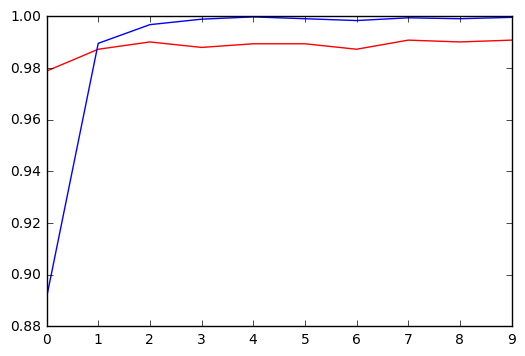

In [40]:
plt.plot(history.history['val_acc'],color='r')
plt.plot(history.history['acc'],color='b')